# Importing Libraries

In [89]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

# Data Cleaning of each portoflio 

In [90]:
# Reading whale returns
whale_df = pd.read_csv("whale_returns.csv", index_col = "Date", infer_datetime_format = True, parse_dates=True)
whale_df.sort_index(ascending=True, inplace=True)

In [91]:
# Count nulls
whale_df.isnull().sum()
whale_df.isnull().sum() / len(whale_df) * 100

SOROS FUND MANAGEMENT LLC      0.09434
PAULSON & CO.INC.              0.09434
TIGER GLOBAL MANAGEMENT LLC    0.09434
BERKSHIRE HATHAWAY INC         0.09434
dtype: float64

In [92]:
# Drop nulls
whale_df.dropna(inplace = True)
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [93]:
# Check data types make sure they are int/float
whale_df.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

# Algo trading returns

In [94]:
# Reading algorithmic returns
algo_df = pd.read_csv("algo_returns.csv", index_col = 'Date', infer_datetime_format = True, parse_dates = True)
algo_df.sort_index(ascending=True, inplace=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [95]:
# Count nulls
algo_df.isnull()
algo_df.isnull().sum()/ len(algo_df) * 100

Algo 1    0.000000
Algo 2    0.483481
dtype: float64

In [96]:
# Drop nulls
algo_df.dropna(inplace = True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [97]:
# Checking null is dropped
algo_df.isnull()
algo_df.isnull().sum() / len(algo_df) * 100

Algo 1    0.0
Algo 2    0.0
dtype: float64

In [98]:
# Check data types make sure they are int/float
algo_df.dtypes

Algo 1    float64
Algo 2    float64
dtype: object

In [99]:
whale_algo_combined = pd.concat([whale_df, algo_df], axis = 1, join = 'inner')

In [100]:
whale_algo_combined.columns

Index(['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1',
       'Algo 2'],
      dtype='object')

In [101]:
whale_algo_combined.isnull().sum() / len(algo_df) * 100

SOROS FUND MANAGEMENT LLC      0.0
PAULSON & CO.INC.              0.0
TIGER GLOBAL MANAGEMENT LLC    0.0
BERKSHIRE HATHAWAY INC         0.0
Algo 1                         0.0
Algo 2                         0.0
dtype: float64

In [102]:
whale_algo_combined.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
Algo 1                         float64
Algo 2                         float64
dtype: object

# S&P 500 Returns

In [103]:
# Reading S&P 500 Closing Prices, sorting index
sp500_df = pd.read_csv("sp500_history.csv", index_col = 'Date', infer_datetime_format = True, parse_dates = True)
sp500_df.sort_index(ascending=True, inplace=True)
sp500_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [104]:
# Ince "Close" has $, leads me to believe that its a string rather than int... Check data types
sp500_df.dtypes

Close    object
dtype: object

In [105]:
# Get rid of $ in order to turn them into integers
sp500_df['Close'] = sp500_df['Close'].str.replace('$', '')

In [106]:
# Convert close price string to inter
sp500_df['Close'] = sp500_df['Close'].astype('float')
sp500_df.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [107]:
# Check Data Types
sp500_df.isnull()
sp500_df.isnull().sum() / len(sp500_df) * 100

Close    0.0
dtype: float64

In [108]:
# Fix Data Types
sp500_df.dropna(inplace = True)
sp500_df.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [109]:
# Calculate Daily Returns
daily_returns_sp500 = sp500_df.pct_change()

In [110]:
# Drop nulls
daily_returns_sp500.dropna(inplace = True)

In [111]:
# Rename Column
daily_returns_sp500.rename(columns = {'Close':'Daily Returns'}, inplace = True)
daily_returns_sp500.head()

,Daily Returns
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


# Combine Whale, Algorithmic, and S&P 500 Returns

In [112]:
# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat([whale_df, algo_df, daily_returns_sp500], axis = 1, join = 'inner')
combined_df.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Daily Returns
Date,,,,,,,
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012
2019-04-23,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841


In [113]:
combined_df.columns

Index(['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1',
       'Algo 2', 'Daily Returns'],
      dtype='object')

-------------------------------------------------------------------

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Caluclate and Plot the daily returns and cumulative returns.

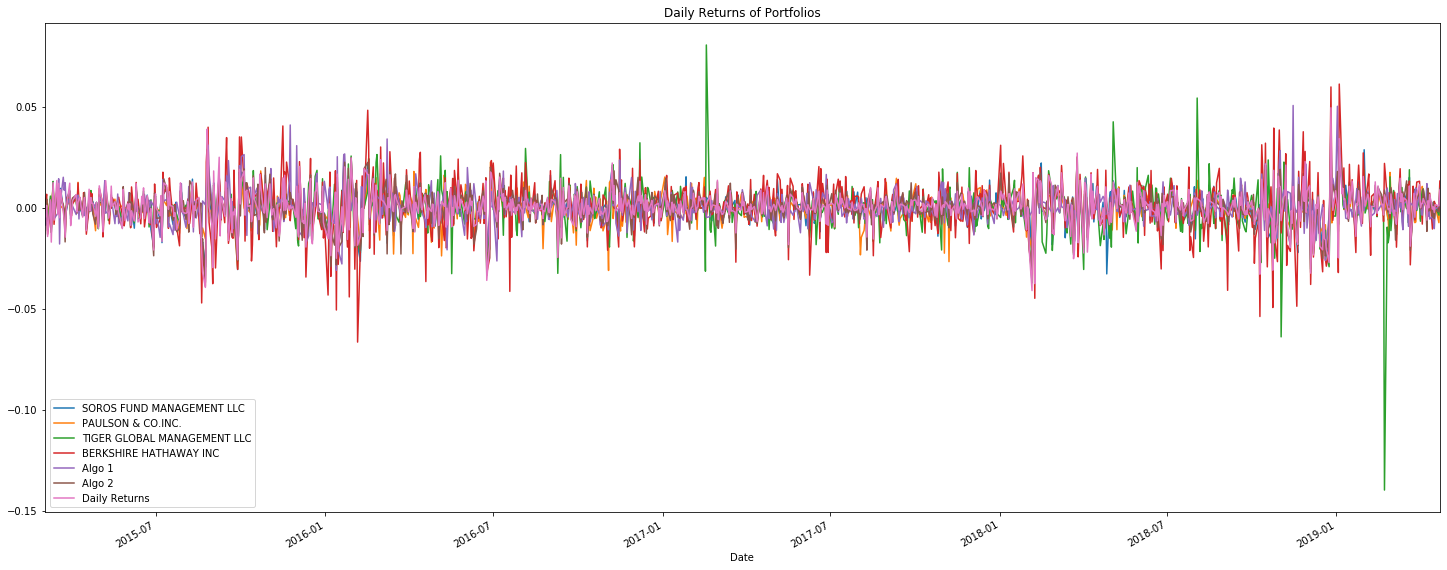

In [114]:
# Plot daily returns
combined_df.plot(figsize=(25,10), title = "Daily Returns of Portfolios")

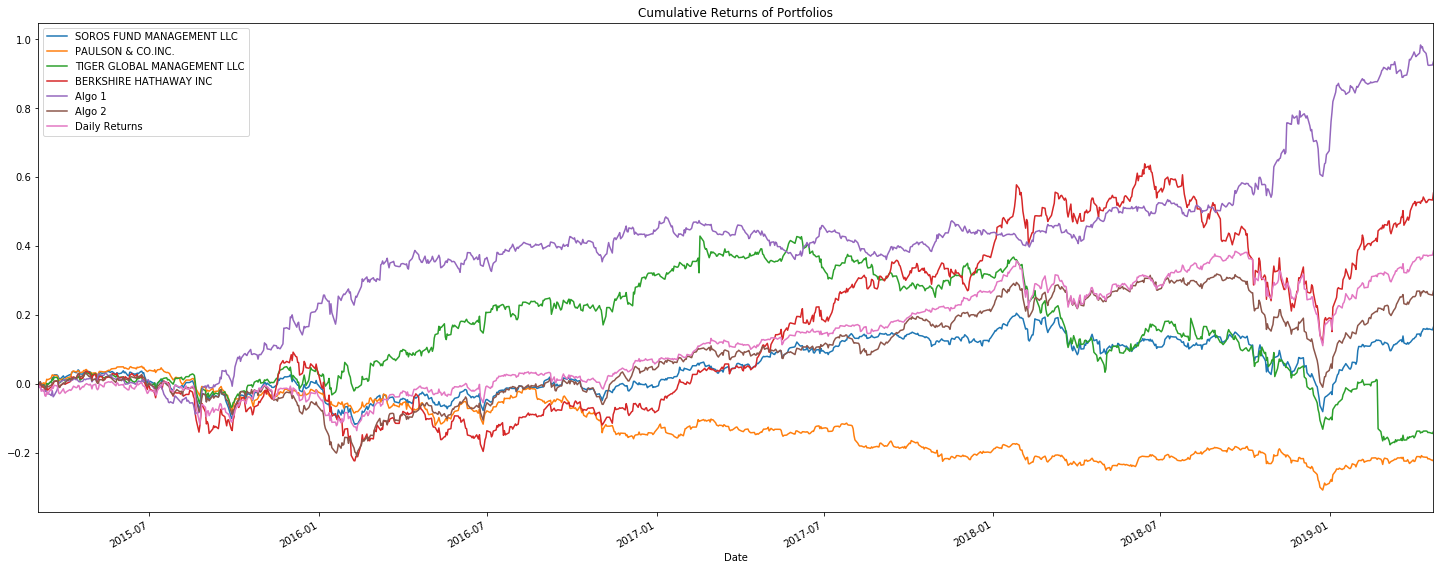

In [115]:
# Plot cumulative returns
combined_cumulative_returns = (1 + combined_df).cumprod() - 1
combined_cumulative_returns.plot(kind = 'line',
                                 figsize=(25,10), 
                                 title = "Cumulative Returns of Portfolios")

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

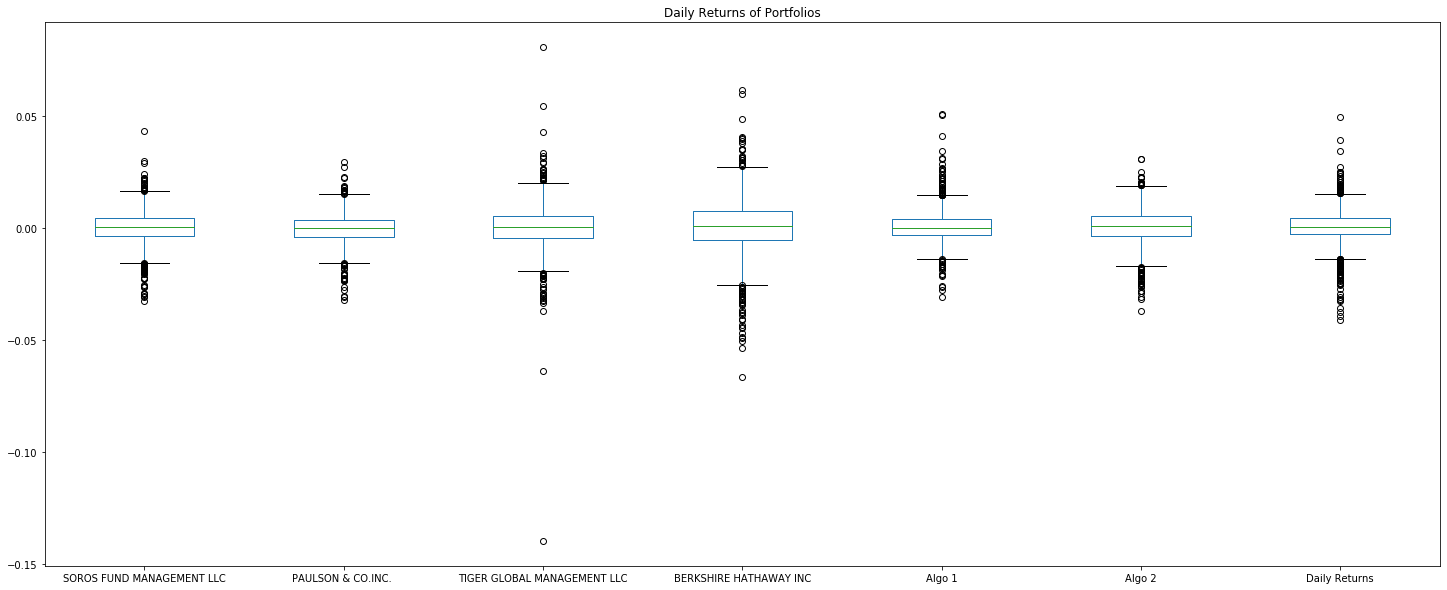

In [116]:
# Box plot to visually show risk
combined_df.plot(figsize=(25,10), kind = 'box',title = "Daily Returns of Portfolios")

In [117]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
combined_standard_deviation = combined_df.std().to_frame()
combined_standard_deviation.columns = ['Std. Dev.']
combined_standard_deviation

,Std. Dev.
SOROS FUND MANAGEMENT LLC,0.007895
PAULSON & CO.INC.,0.007023
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919
Algo 1,0.007620
Algo 2,0.008342
Daily Returns,0.008554


In [118]:
# Determine which portfolios are riskier than the S&P 500
print ("Risk Comparison to S&P500 Benchmark\n")
for index in combined_standard_deviation.index:
    if combined_standard_deviation['Std. Dev.'][index] > combined_standard_deviation.iloc[6,0]:
        print(f'{index}: Risky')
    elif combined_standard_deviation['Std. Dev.'][index] < combined_standard_deviation.iloc[6,0]:
        print(f'{index}: Safe')
    else:
        print('')

Risk Comparison to S&P500 Benchmark

SOROS FUND MANAGEMENT LLC: Safe
PAULSON & CO.INC. : Safe
TIGER GLOBAL MANAGEMENT LLC: Risky
BERKSHIRE HATHAWAY INC: Risky
Algo 1: Safe
Algo 2: Safe



In [119]:
# Calculate the annualized standard deviation (252 trading days)
portfolio_volatility = combined_standard_deviation*(252**0.5) 
portfolio_volatility

,Std. Dev.
SOROS FUND MANAGEMENT LLC,0.125335
PAULSON & CO.INC.,0.111488
TIGER GLOBAL MANAGEMENT LLC,0.172936
BERKSHIRE HATHAWAY INC,0.205077
Algo 1,0.120967
Algo 2,0.132430
Daily Returns,0.135786


----------------------

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

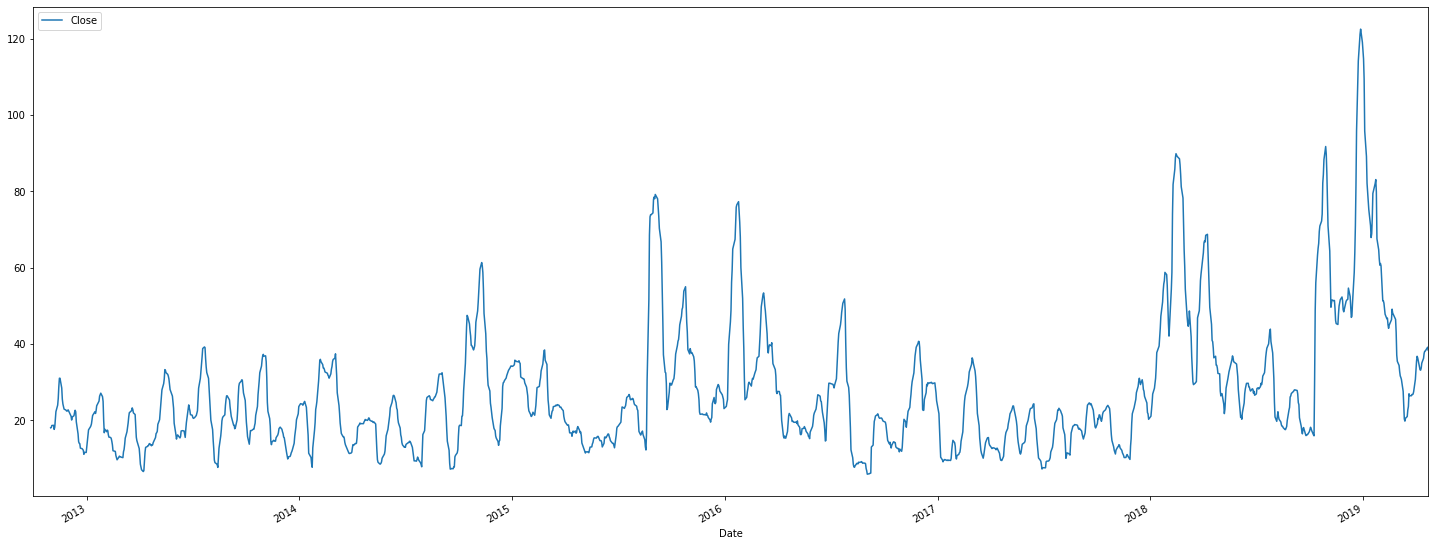

In [120]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
sp500_df.rolling(window=21).std().plot(figsize = (25,10))

In [121]:
# Correlation
combined_df_correlation = combined_df.corr()
combined_df_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Daily Returns
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
Daily Returns,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


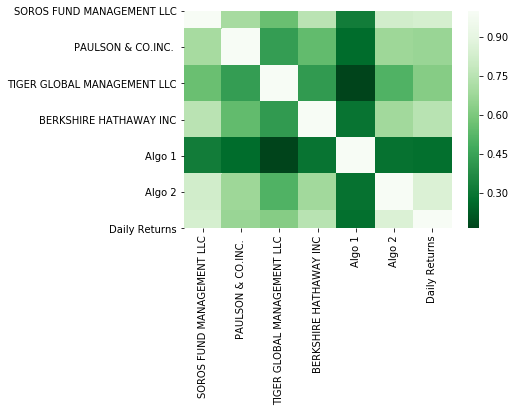

In [122]:
sns.heatmap(combined_df_correlation, cmap = 'Greens_r')

In [123]:
# Calculate covariance of the portfolios and S&P500
covariance_berkshire = combined_df['BERKSHIRE HATHAWAY INC'].cov(combined_df['Daily Returns'])
covariance_soros = combined_df['SOROS FUND MANAGEMENT LLC'].cov(combined_df['Daily Returns'])
covariance_paulson = combined_df['PAULSON & CO.INC. '].cov(combined_df['Daily Returns'])
covariance_tiger = combined_df['TIGER GLOBAL MANAGEMENT LLC'].cov(combined_df['Daily Returns'])
covariance_algo1 = combined_df['Algo 1'].cov(combined_df['Daily Returns'])
covariance_algo2 = combined_df['Algo 2'].cov(combined_df['Daily Returns'])

print (f"BERKSHIRE HATHAWAY: {covariance_berkshire}\nSOROS FUND MANAGEMENT: {covariance_soros}\nPAULSON & CO.INC.: {covariance_paulson}\nTIGER GLOBAL MANAGEMENT: {covariance_tiger}\nAlgo 1: {covariance_algo1}\nAlgo 2: {covariance_algo2}")


BERKSHIRE HATHAWAY: 8.302834941861689e-05
SOROS FUND MANAGEMENT: 5.658503197203636e-05
PAULSON & CO.INC.: 4.0233150936527355e-05
TIGER GLOBAL MANAGEMENT: 5.8141830323050995e-05
Algo 1: 1.8217749991632826e-05
Algo 2: 6.127932374145016e-05


In [124]:
variance_sp500 = combined_df['Daily Returns'].var()
variance_sp500

7.316632424648712e-05

In [125]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
#portfolio_beta = covariance_portfolio/daily_returns_sp500['Daily Returns']
#portfolio_beta
beta_berkshire = covariance_berkshire/variance_sp500
beta_soros = covariance_soros/variance_sp500
beta_paulson = covariance_paulson/variance_sp500
beta_tiger = covariance_tiger/variance_sp500
beta_algo1 = covariance_algo1/variance_sp500
beta_algo2 = covariance_algo2/variance_sp500

print (f"Beta Analysis:\nBERKSHIRE HATHAWAY: {beta_berkshire}\nSOROS FUND MANAGEMENT:{beta_soros}\nPAULSON & CO.INC.: {beta_paulson}\nTIGER GLOBAL MANAGEMENT:{beta_tiger}\nAlgo1:{beta_algo1}\nAlgo2:{beta_algo2}")


Beta Analysis:
BERKSHIRE HATHAWAY: 1.1347891297491723
SOROS FUND MANAGEMENT:0.7733753547794652
PAULSON & CO.INC.: 0.5498861853574534
TIGER GLOBAL MANAGEMENT:0.7946528805681052
Algo1:0.24899091459425748
Algo2:0.8375345402757788


### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

In [126]:
# (OPTIONAL) YOUR CODE HERE

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [127]:
# Annualzied Sharpe Ratios
sharpe_ratios = (combined_df.mean()* 252)/ (combined_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
Daily Returns                  0.648267
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

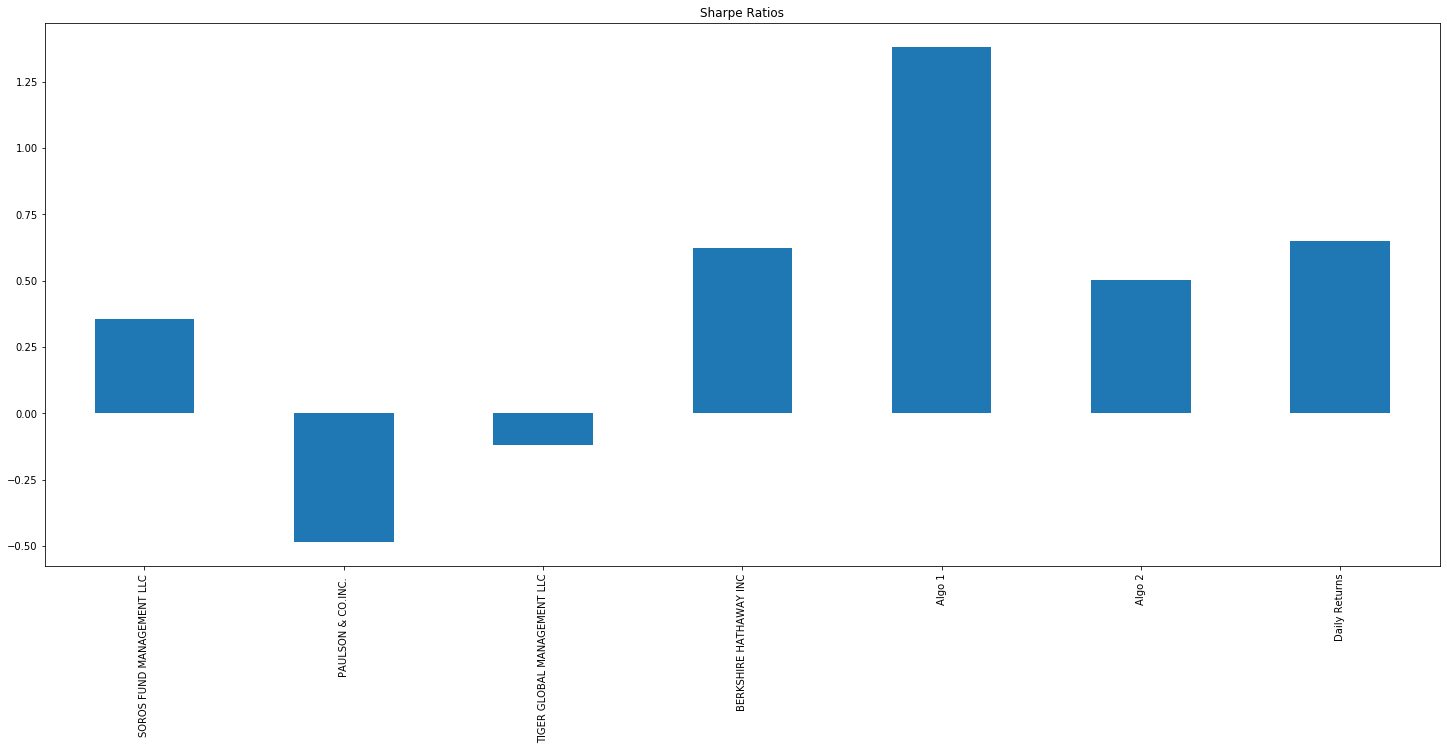

In [128]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios",figsize=(25,10))

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [129]:
# Read the stock
index = ['GOOGL', 'JPM', 'KO', 'JNJ', 'CVS', 'GE']
lg_portfolio_df = pd.DataFrame()

In [130]:
for i in index:
    lg_portfolio_df[i]=wb.DataReader(i, data_source = 'yahoo',
                                  start ='2015-03-03', 
                                  end = '2020-1-1') ['Adj Close']

In [131]:
# Concatenate all stocks into a single DataFrame
lg_portfolio_df.head()

,GOOGL,JPM,KO,JNJ,CVS,GE
Date,,,,,,
2015-03-03,578.789978,54.009583,36.490688,89.836037,92.185997,21.592257
2015-03-04,578.330017,54.149033,36.108376,89.230370,91.856277,21.425262
2015-03-05,581.429993,54.035732,36.023407,89.994049,92.105797,21.558855
2015-03-06,572.900024,53.068321,35.275753,87.878510,90.804771,21.224869
2015-03-09,574.099976,53.599957,35.165295,88.361282,91.339447,21.408562


In [132]:
daily_returns_lg = lg_portfolio_df.pct_change()
daily_returns_lg.head()

,GOOGL,JPM,KO,JNJ,CVS,GE
Date,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,-0.000795,0.002582,-0.010477,-0.006742,-0.003577,-0.007734
2015-03-05,0.005360,-0.002092,-0.002353,0.008559,0.002716,0.006235
2015-03-06,-0.014671,-0.017903,-0.020755,-0.023508,-0.014125,-0.015492
2015-03-09,0.002095,0.010018,-0.003131,0.005494,0.005888,0.008655


In [133]:
# Check Data Types
daily_returns_lg.isnull()
daily_returns_lg.isnull().sum() / len(sp500_df) * 100

GOOGL    0.060643
JPM      0.060643
KO       0.060643
JNJ      0.060643
CVS      0.060643
GE       0.060643
dtype: float64

In [134]:
daily_returns_lg.dropna(inplace = True)
daily_returns_lg.head()

,GOOGL,JPM,KO,JNJ,CVS,GE
Date,,,,,,
2015-03-04,-0.000795,0.002582,-0.010477,-0.006742,-0.003577,-0.007734
2015-03-05,0.005360,-0.002092,-0.002353,0.008559,0.002716,0.006235
2015-03-06,-0.014671,-0.017903,-0.020755,-0.023508,-0.014125,-0.015492
2015-03-09,0.002095,0.010018,-0.003131,0.005494,0.005888,0.008655
2015-03-10,-0.024821,-0.025041,-0.016912,-0.011226,-0.009463,-0.018331


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [135]:
# Calculate weighted portfolio returns
weights = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
portfolio_returns_lg = daily_returns_lg.dot(weights).to_frame()
portfolio_returns_lg.columns = ['LG Portfolio Returns']
portfolio_returns_lg

,LG Portfolio Returns
Date,
2015-03-04,-0.004457
2015-03-05,0.003071
2015-03-06,-0.017742
2015-03-09,0.004836
2015-03-10,-0.017632
...,...
2019-12-26,0.005364
2019-12-27,-0.000851
2019-12-30,-0.006262


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [136]:
all_portfolios_df = pd.concat([portfolio_returns_lg, combined_df], axis = 1, join = 'inner')
all_portfolios_df.tail()

,LG Portfolio Returns,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Daily Returns
Date,,,,,,,,
2019-04-16,0.006129,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,0.003119,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.002944,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579
2019-04-22,0.002375,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012
2019-04-23,0.009657,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841


In [137]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_portfolios_df.isnull().sum() / len(sp500_df) * 100

LG Portfolio Returns           0.0
SOROS FUND MANAGEMENT LLC      0.0
PAULSON & CO.INC.              0.0
TIGER GLOBAL MANAGEMENT LLC    0.0
BERKSHIRE HATHAWAY INC         0.0
Algo 1                         0.0
Algo 2                         0.0
Daily Returns                  0.0
dtype: float64

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [138]:
# Risk
volatility_lg = all_portfolios_df.std() * np.sqrt(252)
volatility_lg

LG Portfolio Returns           0.139162
SOROS FUND MANAGEMENT LLC      0.125393
PAULSON & CO.INC.              0.111517
TIGER GLOBAL MANAGEMENT LLC    0.173019
BERKSHIRE HATHAWAY INC         0.205146
Algo 1                         0.121018
Algo 2                         0.132492
Daily Returns                  0.135830
dtype: float64

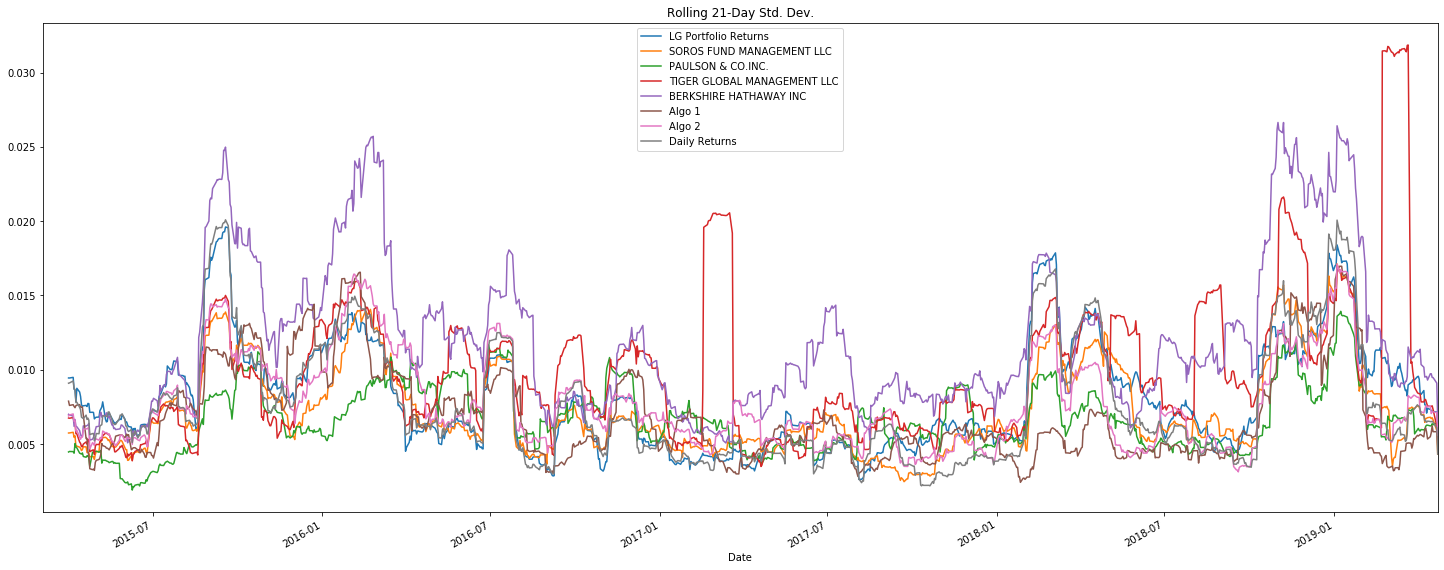

In [139]:
# Rolling
all_portfolios_df.rolling(window=21).std().plot(title="Rolling 21-Day Std. Dev.", figsize=(25,10))


In [140]:
# Beta
covariance_LG = all_portfolios_df['LG Portfolio Returns'].cov(all_portfolios_df['Daily Returns'])
beta_LG = covariance_LG/variance_sp500
beta_LG

0.8953815351498804

In [141]:
# Annualzied Sharpe Ratios
all_sharpe_ratios = (all_portfolios_df.mean()* 252)/ (all_portfolios_df.std() * np.sqrt(252))
all_sharpe_ratios

LG Portfolio Returns           0.396302
SOROS FUND MANAGEMENT LLC      0.359034
PAULSON & CO.INC.             -0.473108
TIGER GLOBAL MANAGEMENT LLC   -0.120425
BERKSHIRE HATHAWAY INC         0.629941
Algo 1                         1.383268
Algo 2                         0.503342
Daily Returns                  0.656761
dtype: float64

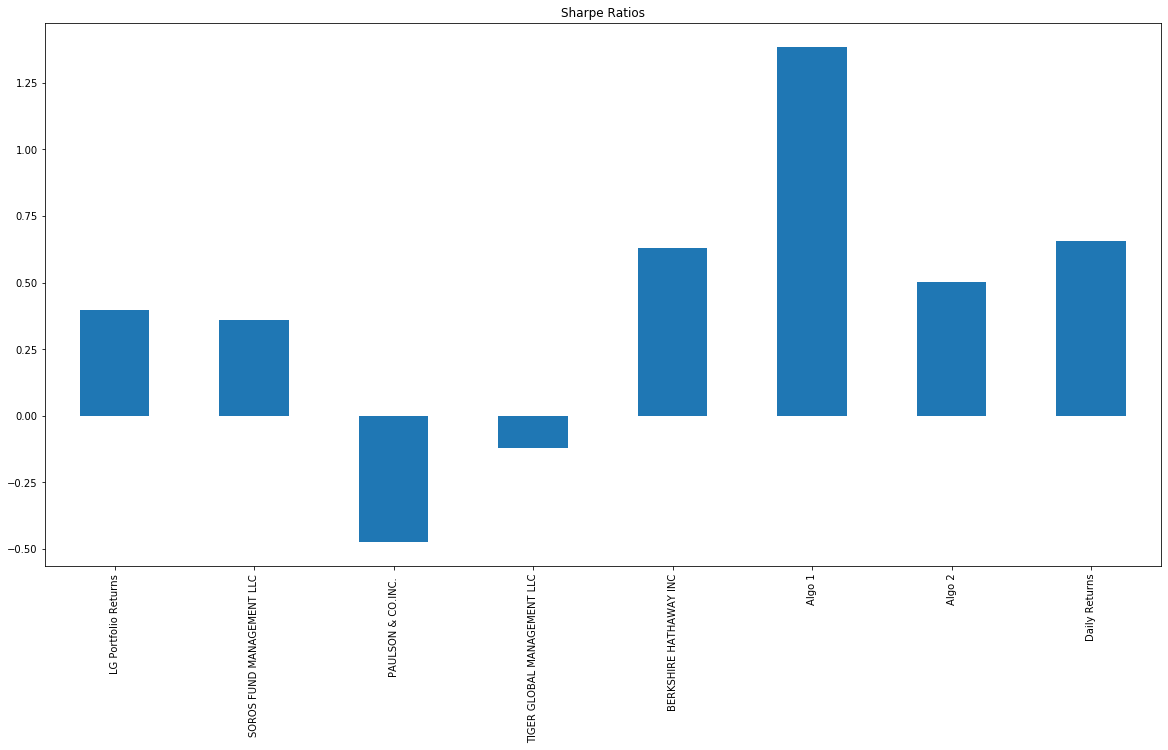

In [142]:
# Visualize the sharpe ratios as a bar plot
all_sharpe_ratios.plot(kind="bar", title="Sharpe Ratios",figsize=(20,10))

## Include correlation analysis to determine which stocks (if any) are correlated

In [143]:
LG_portfolio_corr = all_portfolios_df.corr()
LG_portfolio_corr

,LG Portfolio Returns,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Daily Returns
LG Portfolio Returns,1.000000,0.679039,0.577003,0.580592,0.595473,0.223632,0.703501,0.873380
SOROS FUND MANAGEMENT LLC,0.679039,1.000000,0.699961,0.561246,0.754385,0.321175,0.826869,0.837908
PAULSON & CO.INC.,0.577003,0.699961,1.000000,0.434551,0.545465,0.268692,0.678214,0.669612
TIGER GLOBAL MANAGEMENT LLC,0.580592,0.561246,0.434551,1.000000,0.424465,0.164384,0.507414,0.624023
BERKSHIRE HATHAWAY INC,0.595473,0.754385,0.545465,0.424465,1.000000,0.291912,0.688112,0.751297
Algo 1,0.223632,0.321175,0.268692,0.164384,0.291912,1.000000,0.288214,0.279366
Algo 2,0.703501,0.826869,0.678214,0.507414,0.688112,0.288214,1.000000,0.858828
Daily Returns,0.873380,0.837908,0.669612,0.624023,0.751297,0.279366,0.858828,1.000000
